# Explore here

In [3]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

df


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [4]:
df["date"] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [5]:
df.head()


,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


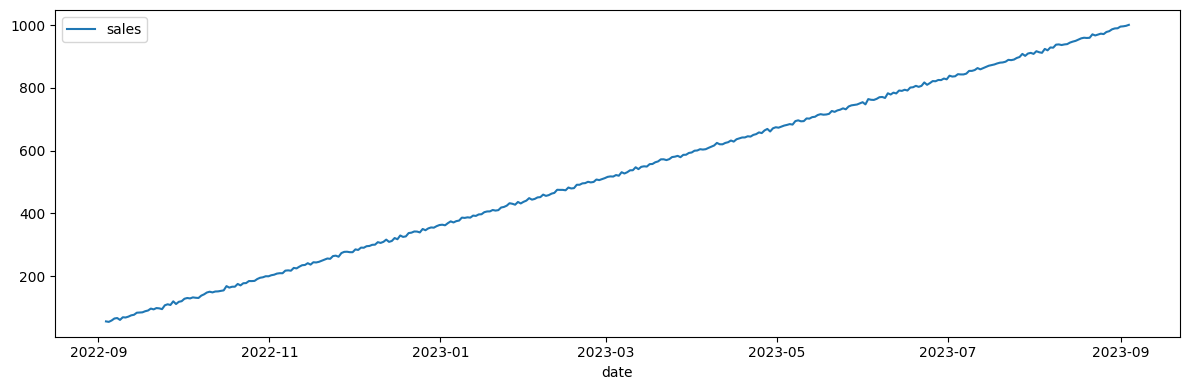

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (12, 4))

sns.lineplot(data = df)

plt.tight_layout()

plt.show()



In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period = 30)
decomposition


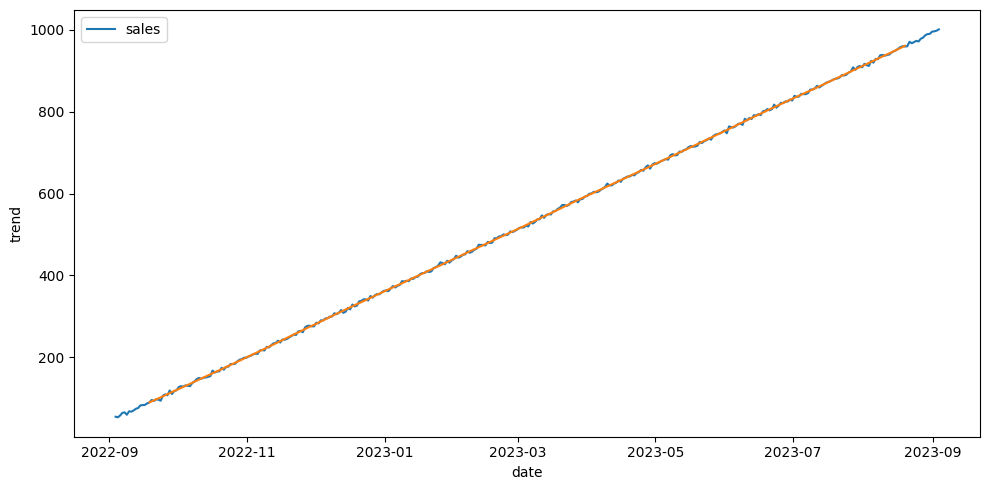

In [8]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()


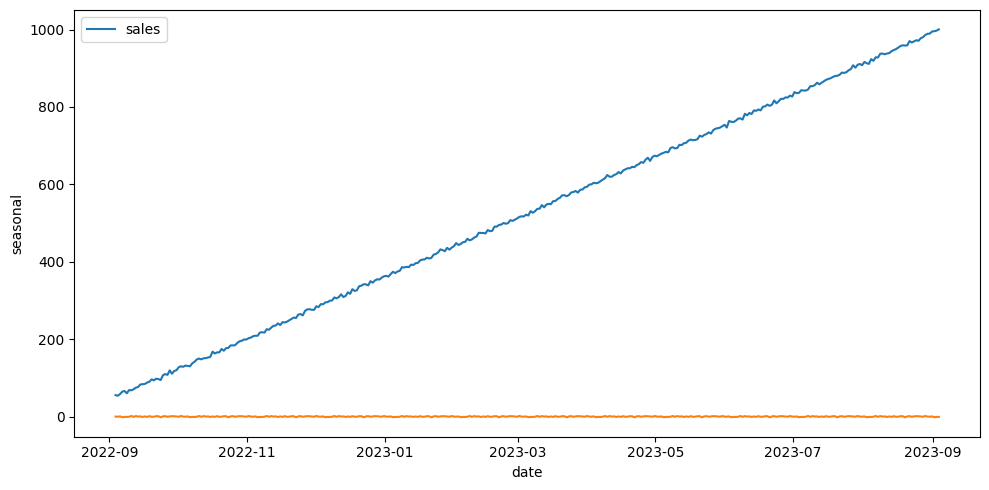

In [9]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)


Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

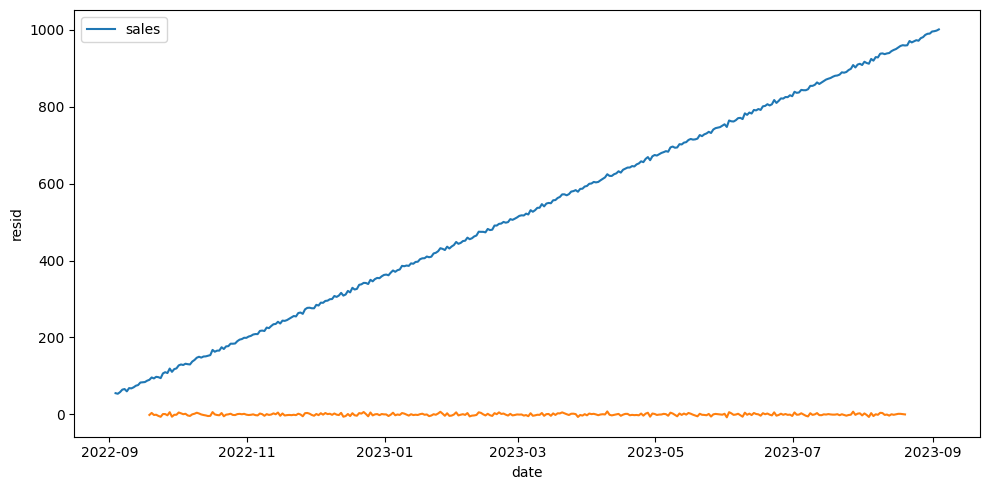

In [11]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

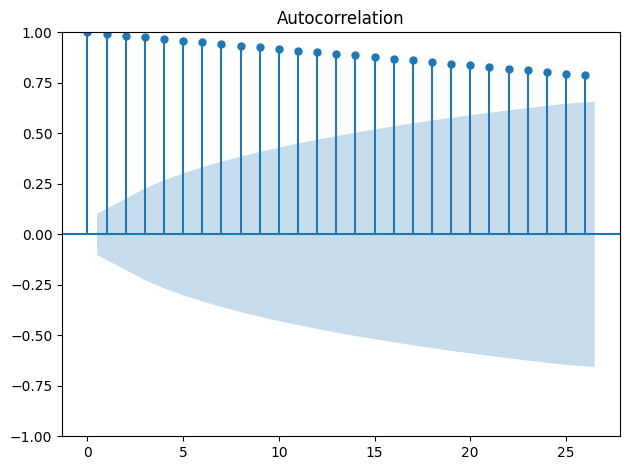

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)

plt.tight_layout()

plt.show()

In [13]:
df_stationary = df.diff().dropna()

test_stationarity(df_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [14]:
from pmdarima import auto_arima

model = auto_arima(df_stationary, seasonal = True, trace = True, m = 30)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[30] intercept   : AIC=1845.252, Time=3.13 sec
 ARIMA(0,0,0)(0,0,0)[30] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[30] intercept   : AIC=1971.739, Time=0.59 sec
 ARIMA(0,0,1)(0,0,1)[30] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,0,0)[30]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[30] intercept   : AIC=1843.274, Time=2.59 sec
 ARIMA(2,0,2)(0,0,0)[30] intercept   : AIC=1843.049, Time=0.37 sec
 ARIMA(2,0,2)(1,0,0)[30] intercept   : AIC=1843.222, Time=2.41 sec
 ARIMA(1,0,2)(0,0,0)[30] intercept   : AIC=1843.587, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[30] intercept   : AIC=1841.533, Time=0.29 sec
 ARIMA(2,0,1)(1,0,0)[30] intercept   : AIC=1921.469, Time=1.19 sec
 ARIMA(2,0,1)(0,0,1)[30] intercept   : AIC=1841.423, Time=2.88 sec
 ARIMA(2,0,1)(1,0,1)[30] intercept   : AIC=inf, Time=2.93 sec
 ARIMA(2,0,1)(0,0,2)[30] intercept   : AIC=1843.425, Time=13.25 sec
 ARIMA(2,0,1)(1,0,2)[30] int

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 30)   Log Likelihood                -914.720
Date:                            Sat, 11 May 2024   AIC                           1839.439
Time:                                    01:08:03   BIC                           1858.939
Sample:                                09-04-2022   HQIC                          1847.188
                                     - 09-03-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8192      0.134     20.986      0.000       2.556       3.083
ar.L1         -0.0850      0.052     -1.641      0.101      -0.187       0.016
ma.L1         -0.9435      0.020    -47.190      0.000      -0.983      -0.904
ma.S.L30      -0.0806      0.061     -1.323      0.186      -0.200       0.039
sigma2         8.7304      0.683     12.788      0.000       7.392      10.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.99   Prob(JB):                         0.68
Heteroskedasticity (H):               0.92   Skew:                             0.07
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train_df = df_stationary[df_stationary.index < '2023-08-03']
test_df = df_stationary[df_stationary.index >= '2023-08-03']

test_df


,sales
date,
2023-08-03 17:10:08.079328,-1.823135
2023-08-04 17:10:08.079328,12.399215
2023-08-05 17:10:08.079328,-4.483891
2023-08-06 17:10:08.079328,9.223215
2023-08-07 17:10:08.079328,-0.802096
2023-08-08 17:10:08.079328,9.633425
2023-08-09 17:10:08.079328,0.829616
2023-08-10 17:10:08.079328,-1.962946
2023-08-11 17:10:08.079328,1.899384


In [17]:
model = auto_arima(train_df, seasonal = True, trace = True, m = 15)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[15] intercept   : AIC=1686.609, Time=3.57 sec
 ARIMA(0,0,0)(0,0,0)[15] intercept   : AIC=1917.840, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[15] intercept   : AIC=1804.550, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[15] intercept   : AIC=1682.576, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[15]             : AIC=2018.663, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[15] intercept   : AIC=1680.957, Time=0.18 sec
 ARIMA(0,0,1)(1,0,0)[15] intercept   : AIC=1682.648, Time=0.90 sec
 ARIMA(0,0,1)(1,0,1)[15] intercept   : AIC=1683.530, Time=1.78 sec
 ARIMA(1,0,1)(0,0,0)[15] intercept   : AIC=1679.948, Time=0.77 sec
 ARIMA(1,0,1)(1,0,0)[15] intercept   : AIC=1681.672, Time=1.91 sec
 ARIMA(1,0,1)(0,0,1)[15] intercept   : AIC=1681.608, Time=1.61 sec
 ARIMA(1,0,1)(1,0,1)[15] intercept   : AIC=1682.676, Time=2.66 sec
 ARIMA(1,0,0)(0,0,0)[15] intercept   : AIC=1802.873, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[15] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[15]

In [22]:
forecast = model.predict(32)
forecast


2023-08-03 17:10:08.079328    6.078208
2023-08-04 17:10:08.079328    2.281868
2023-08-05 17:10:08.079328    2.596645
2023-08-06 17:10:08.079328    2.596645
2023-08-07 17:10:08.079328    2.596645
2023-08-08 17:10:08.079328    2.596645
2023-08-09 17:10:08.079328    2.596645
2023-08-10 17:10:08.079328    2.596645
2023-08-11 17:10:08.079328    2.596645
2023-08-12 17:10:08.079328    2.596645
2023-08-13 17:10:08.079328    2.596645
2023-08-14 17:10:08.079328    2.596645
2023-08-15 17:10:08.079328    2.596645
2023-08-16 17:10:08.079328    2.596645
2023-08-17 17:10:08.079328    2.596645
2023-08-18 17:10:08.079328    2.596645
2023-08-19 17:10:08.079328    2.596645
2023-08-20 17:10:08.079328    2.596645
2023-08-21 17:10:08.079328    2.596645
2023-08-22 17:10:08.079328    2.596645
2023-08-23 17:10:08.079328    2.596645
2023-08-24 17:10:08.079328    2.596645
2023-08-25 17:10:08.079328    2.596645
2023-08-26 17:10:08.079328    2.596645
2023-08-27 17:10:08.079328    2.596645
2023-08-28 17:10:08.07932

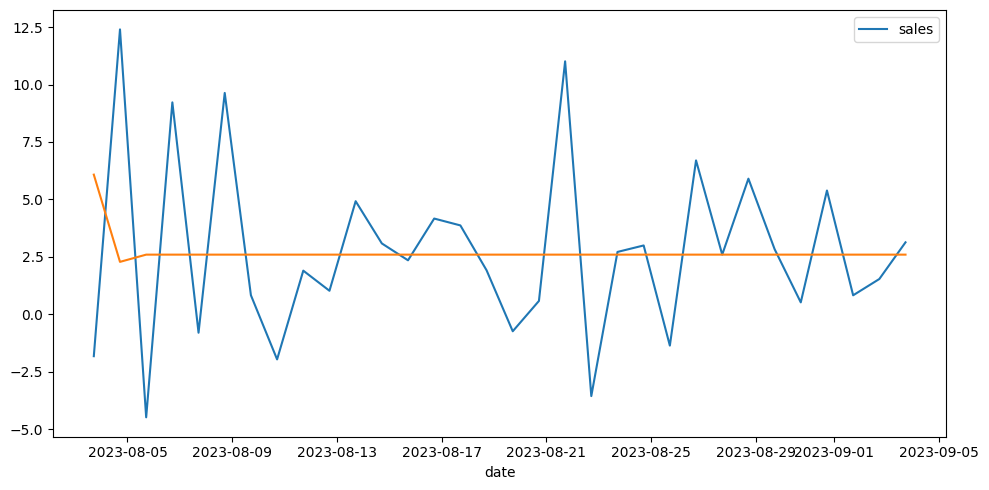

In [23]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = test_df)
sns.lineplot(data = forecast)

plt.tight_layout()

plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_df, forecast)
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(test_df, forecast)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 16.912384062152082
R-squared (R2) Score: -0.10117829869700512


In [26]:
train_df = df[df.index < '2023-08-03']
test_df = df[df.index >= '2023-08-03']


In [27]:
model = auto_arima(train_df, seasonal = True, trace = True, m = 7)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1680.833, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1917.840, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1796.561, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2018.663, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=1678.683, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=1683.015, Time=0.37 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=1677.463, Time=0.90 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=1679.634, Time=1.07 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=1677.298, Time=3.46 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=1679.251, Time=2.99 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=1679.147, Time=1.59 sec
 ARIMA(1,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(2,1,1)(2,0,1)[7] intercept   : AIC=1797.4

In [28]:
forecast = model.predict(32)
forecast

2023-08-03 17:10:08.079328    920.565674
2023-08-04 17:10:08.079328    921.224446
2023-08-05 17:10:08.079328    924.532776
2023-08-06 17:10:08.079328    927.344776
2023-08-07 17:10:08.079328    928.684345
2023-08-08 17:10:08.079328    932.836749
2023-08-09 17:10:08.079328    933.847258
2023-08-10 17:10:08.079328    937.954227
2023-08-11 17:10:08.079328    939.819838
2023-08-12 17:10:08.079328    942.710299
2023-08-13 17:10:08.079328    945.313563
2023-08-14 17:10:08.079328    947.565460
2023-08-15 17:10:08.079328    950.256131
2023-08-16 17:10:08.079328    952.638862
2023-08-17 17:10:08.079328    954.845899
2023-08-18 17:10:08.079328    957.974492
2023-08-19 17:10:08.079328    960.327767
2023-08-20 17:10:08.079328    962.921782
2023-08-21 17:10:08.079328    965.804603
2023-08-22 17:10:08.079328    968.325765
2023-08-23 17:10:08.079328    971.100560
2023-08-24 17:10:08.079328    974.022081
2023-08-25 17:10:08.079328    976.179226
2023-08-26 17:10:08.079328    978.979416
2023-08-27 17:10

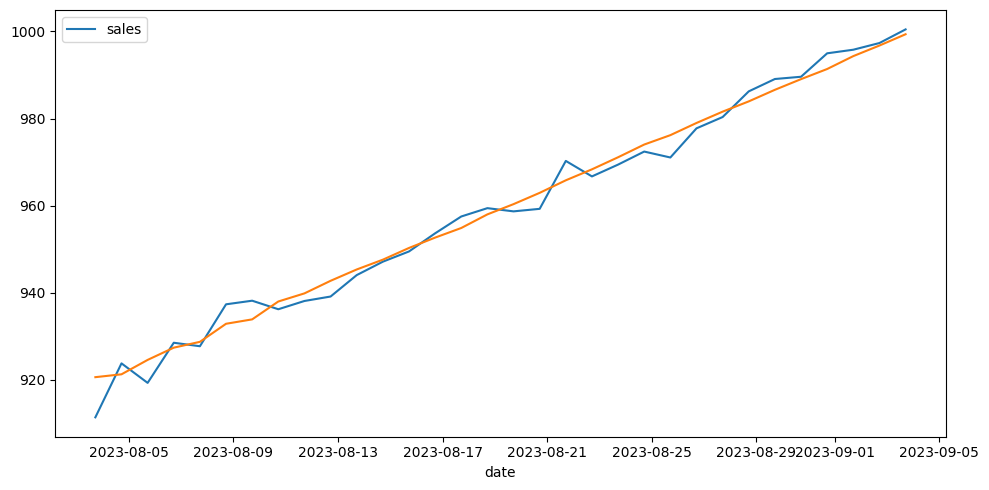

In [29]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = test_df)
sns.lineplot(data = forecast)

plt.tight_layout()

plt.show()


In [31]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_df, forecast)
print("Mean Squared Error (MSE):", mse)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(test_df, forecast)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 9.185134703414839
R-squared (R2) Score: 0.9850108519731271


In [32]:
from pickle import dump

dump(model,open( "../models/modelo_serie_tiempo.model","wb"))